In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [1]:
# Создаем класс узла списка
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None
# Создаем класс хэш-таблицы
class HashTable:
    def __init__(self):
        self.capacity = 10 
        self.size = 0 
        self.buckets = [None] * self.capacity 

    # Метод добавления элемента в таблицу
    def add(self, key, value):
        index = hash(key) % self.capacity 
        node = self.buckets[index]
        while node: 
            if node.key == key:
                node.value = value
                return
            node = node.next
        new_node = Node(key, value)
        new_node.next = self.buckets[index]
        self.buckets[index] = new_node
        self.size += 1
        if self.size > 0.7 * self.capacity:
            self.resize()

    # Метод получения значения по ключу
    def get(self, key):
        index = hash(key) % self.capacity
        node = self.buckets[index]
        while node:
            if node.key == key: 
                return node.value
            node = node.next
        return None

    # Метод изменения емкости таблицы
    def resize(self):
        new_capacity = self.capacity * 2
        new_buckets = [None] * new_capacity
        # перехешируем все элементы из старой таблицы в новую
        for i in range(self.capacity):
            node = self.buckets[i]
            while node:
                index = hash(node.key) % new_capacity
                if new_buckets[index]:
                    new_node = new_buckets[index]
                    while new_node.next:
                        new_node = new_node.next
                    new_node.next = Node(node.key, node.value)
                else:
                    new_buckets[index] = Node(node.key, node.value)
                node = node.next
        self.capacity = new_capacity
        self.buckets = new_buckets

In [3]:
def shell_sort(arr):
    n = len(arr)
    gap = n // 2
    while gap > 0:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            arr[j] = temp
        gap = gap // 2
    return arr

In [4]:
def account(file):
    hash_table1 = HashTable()
    hash_table2 = HashTable()
    total_revenue = 0
    max_sold_quantity = 0
    top_selling_item = ""
    revenue_array = []

    next(file)  # Пропускаем первую строку с заголовками

    for row in file:
        total_revenue += int(row[6])
        if max_sold_quantity < int(row[4]):
            max_sold_quantity = int(row[4])
            top_selling_item = row[2]
        revenue_array.append(int(row[6]))
        hash_table2.add(str(row[6]), row[2])
        hash_table1.add(str(row[2]), row[4])
        hash_table1.add(str(row[2]) + "1", row[6])
        

    for row in file:
        print(f'{row[2]} был продан {hash_table1.get(str(row[2]))} раз, '
              f'доля товара от выручки составляет '
              f'{round(int(hash_table1.get(str(row[2]) + "1")) / total_revenue * 100, 2)}%')

    sorted_revenue = shell_sort(revenue_array)
    return total_revenue, top_selling_item, hash_table2.get(str(sorted_revenue[-1]))



Общая выручка магазина: 3059 рублей
Товар, который был продан наибольшее количество раз: Брелоки
Товар, который принес наибольшую выручку: Рюкзак


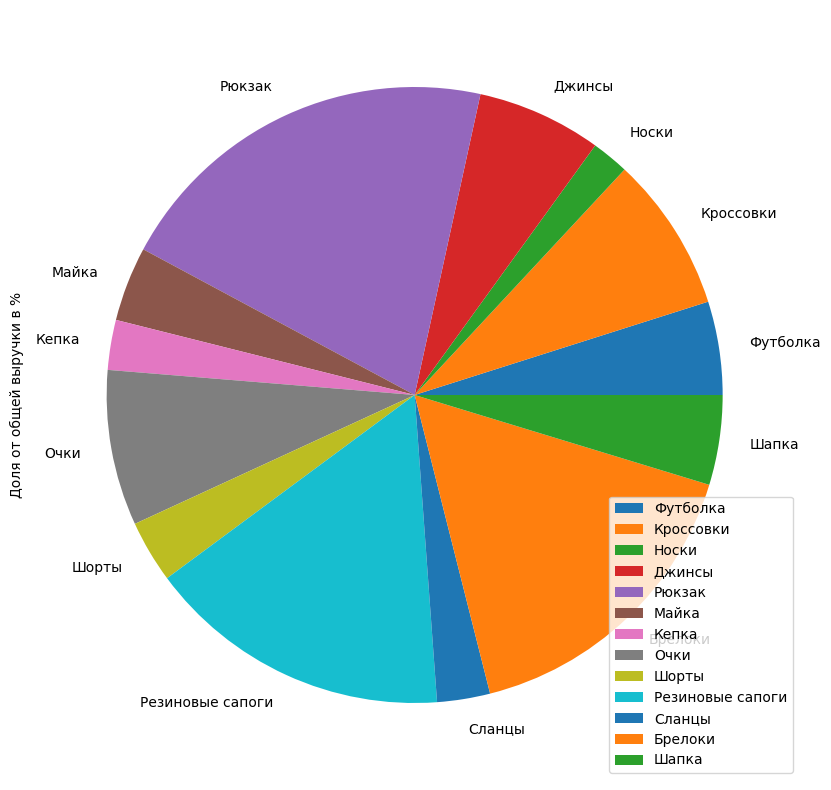

In [5]:
revenue = 0
try:
    data = pd.read_csv('table.csv', sep=';')
    with open("table.csv", encoding='utf-8') as file:
        file_reader = csv.reader(file, delimiter=";")
        total_revenue, top_selling_item, max_revenue_item = account(file_reader)
        print()
        print(f'Общая выручка магазина: {total_revenue} рублей')
        print(f'Товар, который был продан наибольшее количество раз: {top_selling_item}')
        print(f'Товар, который принес наибольшую выручку: {max_revenue_item}')
except FileNotFoundError:
    print('Файл не найден')

# Обновление значения переменной revenue
revenue = total_revenue

# Пересчитываем столбец "Доля от общей выручки в %"
data['Доля от общей выручки в %'] = data['Общая стоимость'] / (revenue / 100)
data['Доля от общей выручки в %'] = data['Доля от общей выручки в %'].round(2)
data.index = data['Название товара']


data.plot(y = 'Доля от общей выручки в %', kind = 'pie', figsize=(10,10))
plt.show()
